# Notebook 1: EDA and Data Cleaning

This notebook covers:
1. Loading raw data
2. Data exploration and summary statistics
3. Data preprocessing and feature engineering
4. Exploratory data analysis (EDA) visualizations

## Setup and Imports

In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

    
# Import project modules
from src.data.load_raw import load_raw_data, get_data_summary
from src.data.preprocess import preprocess_data, save_clean_data
from src.visualization.eda_plots import generate_all_eda_plots
from src.config import RAW_CHURN_FILE, CLEAN_CHURN_FILE

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All imports successful!")

✓ All imports successful!


## Step 1: Load Raw Data

In [6]:
# Load the raw churn dataset
df_raw = load_raw_data()
print(f"\nDataset shape: {df_raw.shape}")
df_raw.head()

✓ Successfully loaded raw data from: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/data/raw/Churn_Modelling.csv
  Shape: (10000, 14)
  Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Dataset shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Step 2: Data Exploration

In [7]:
# Get comprehensive data summary
get_data_summary(df_raw)


DATA SUMMARY

Shape: 10000 rows × 14 columns

Column Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

First 5 rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  F

In [8]:
# Check for missing values
print("Missing values per column:")
print(df_raw.isnull().sum())
print(f"\nTotal missing values: {df_raw.isnull().sum().sum()}")

Missing values per column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Total missing values: 0


In [9]:
# Check data types
print("Data types:")
print(df_raw.dtypes)

Data types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [10]:
# Check unique values for categorical columns
print("Unique values in categorical columns:")
print(f"Geography: {df_raw['Geography'].unique()}")
print(f"Gender: {df_raw['Gender'].unique()}")
print(f"HasCrCard: {df_raw['HasCrCard'].unique()}")
print(f"IsActiveMember: {df_raw['IsActiveMember'].unique()}")
print(f"Exited: {df_raw['Exited'].unique()}")

Unique values in categorical columns:
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
HasCrCard: [1 0]
IsActiveMember: [1 0]
Exited: [1 0]


In [11]:
# Check churn distribution
print("Churn distribution:")
print(df_raw['Exited'].value_counts())
print(f"\nChurn rate: {df_raw['Exited'].mean():.2%}")

Churn distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64

Churn rate: 20.37%


## Step 3: Data Preprocessing

In [18]:
# Run the preprocessing pipeline
df_clean = preprocess_data(df_raw)
df_clean.head()


PREPROCESSING PIPELINE

Dropping columns: ['RowNumber', 'CustomerId', 'Surname']
✓ No missing values found
✓ Data cleaned. Shape: (10000, 11)
✓ Created AgeGroup column with bins: ['<=25', '26-35', '36-45', '46-55', '>=56']
✓ Created IncomeGroup column with labels: ['Low', 'Mid', 'High']

✓ Preprocessing complete!
  Final shape: (10000, 13)
  New columns: AgeGroup, IncomeGroup



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,IncomeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-45,Mid
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-45,Mid
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-45,Mid
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-45,Mid
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-45,Mid


In [19]:
# Inspect new columns
print("Age Group distribution:")
print(df_clean['AgeGroup'].value_counts().sort_index())

print("\nIncome Group distribution:")
print(df_clean['IncomeGroup'].value_counts())

Age Group distribution:
AgeGroup
<=25      611
26-35    3542
36-45    3736
46-55    1311
>=56      800
Name: count, dtype: int64

Income Group distribution:
IncomeGroup
Mid     3334
Low     3333
High    3333
Name: count, dtype: int64


In [20]:
# Save cleaned data
save_clean_data(df_clean)
print(f"✓ Cleaned data saved to: {CLEAN_CHURN_FILE}")

✓ Saved cleaned data to: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/data/interim/churn_clean.csv
✓ Cleaned data saved to: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/data/interim/churn_clean.csv


## Step 4: Exploratory Data Analysis (EDA)


GENERATING EDA PLOTS

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/churn_distribution.png


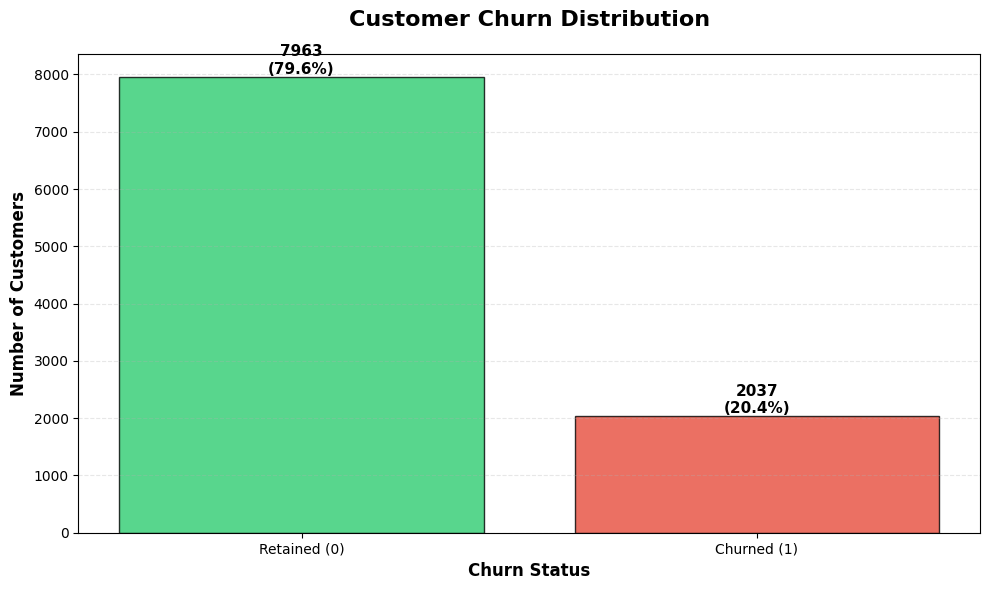

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/age_distribution.png


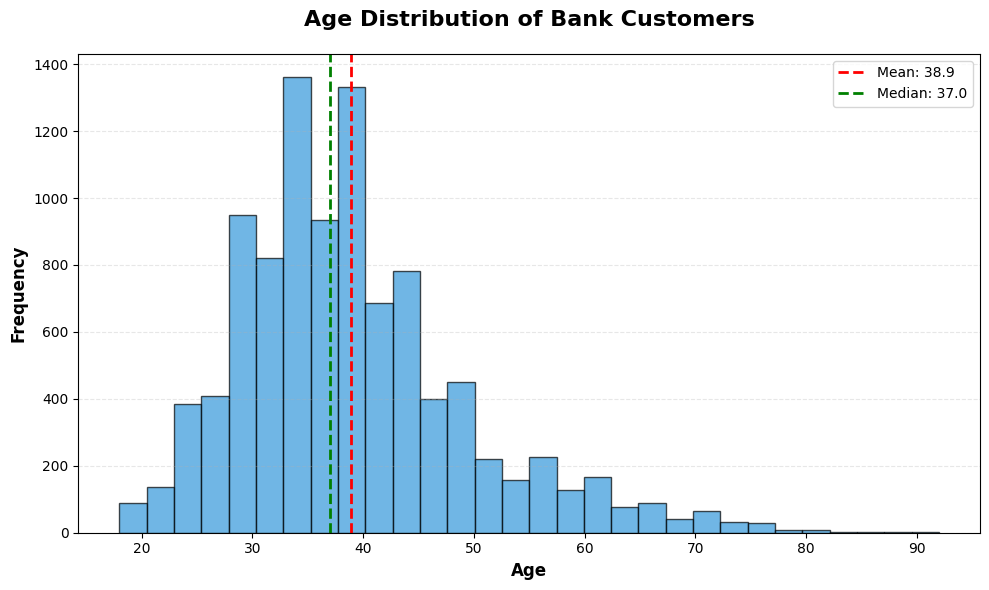

✓ Saved: /home/toanhac/playground/datawarehouse/bank_churn_dwh_dss/reports/figures/churn_by_geography.png


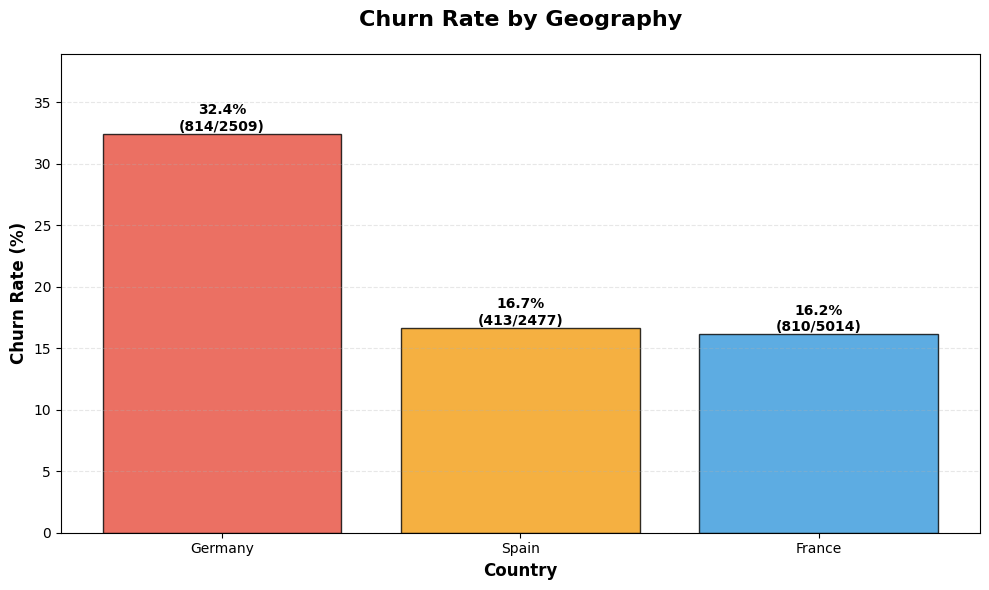


✓ All EDA plots generated!



In [21]:
# Generate all EDA plots
generate_all_eda_plots(df_clean, save=True, show=True)

In [22]:
# Additional analysis: Churn by Gender
churn_by_gender = df_clean.groupby('Gender')['Exited'].agg(['sum', 'count', 'mean'])
churn_by_gender['churn_rate_pct'] = churn_by_gender['mean'] * 100
print("Churn by Gender:")
print(churn_by_gender)

Churn by Gender:
         sum  count      mean  churn_rate_pct
Gender                                       
Female  1139   4543  0.250715       25.071539
Male     898   5457  0.164559       16.455928


In [23]:
# Correlation analysis
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
correlation_matrix = df_clean[numeric_cols].corr()

print("Correlation with Churn (Exited):")
print(correlation_matrix['Exited'].sort_values(ascending=False))

Correlation with Churn (Exited):
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64
